## 📊 Analyzing Data with Pandas and Visualizing Results with Matplotlib

### 📝 Description & Objective
For this assignment, the goal is to:

- Load and analyze a dataset using the **pandas** library in Python.  
- Create simple plots and charts with the **matplotlib** library for visualizing the data.

---

### 🔹 Task 1: Load and Explore the Dataset
1. Choose a dataset in **CSV format** (e.g., Iris dataset, sales dataset, or any dataset of your choice).  
2. Load the dataset using **pandas**.  
3. Display the first few rows of the dataset using `.head()` to inspect the data.  
4. Explore the structure of the dataset:
   - Check data types.  
   - Identify missing values.  
5. Clean the dataset by either **filling** or **dropping** missing values.  

---

### 🔹 Task 2: Basic Data Analysis
1. Compute the basic statistics of the numerical columns (mean, median, standard deviation) using `.describe()`.  
2. Perform **groupings** on a categorical column (e.g., species, region, or department).  
3. Compute the **mean** of a numerical column for each group.  
4. Identify any **patterns** or interesting findings from your analysis.  

---

### 🔹 Task 3: Data Visualization
Create at least **four different types of visualizations**:

1. **Line Chart**  
   - Show trends over time (e.g., time-series of sales data).  

2. **Bar Chart**  
   - Compare a numerical value across categories (e.g., average petal length per species).  

3. **Histogram**  
   - Display the distribution of a numerical column.  

4. **Scatter Plot**  
   - Visualize the relationship between two numerical columns (e.g., sepal length vs. petal length).  

📌 **Customization**:  
- Add **titles**, **labels for axes**, and **legends** where necessary.  
- Use **seaborn** for styling to make charts more visually appealing.  

---

### 🔹 Additional Instructions
- **Dataset Suggestions**:  
  - Public datasets from **Kaggle** or **UCI Machine Learning Repository**.  
  - The **Iris dataset** can be accessed via `sklearn.datasets.load_iris()` for analysis.  

- **Plot Customization**:  
  - Use matplotlib for labels, titles, and legends.  
  - Apply seaborn for improved visual styles.  

- **Error Handling**:  
  - Handle issues during file reading (e.g., file not found).  
  - Manage missing data or incorrect data types using **try-except**.  

---


## Solution 

In [1]:
# ========================
# 🔹 Import Libraries
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For clean display
pd.set_option("display.max_columns", None)

In [2]:
# ========================
# 🔹 Task 1: Load and Explore the Dataset
# ========================
try:
    # Define column names for Iris dataset
    column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
    
    # Load dataset with column names
    df = pd.read_csv("data/iris.data", header=None, names=column_names)
    
    # Display first 5 rows
    print("First 5 rows of dataset:")
    print(df.head())
    
    # Check structure and missing values
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Clean missing values (example: drop rows with nulls)
    df = df.dropna()
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check your file path.")

First 5 rows of dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width  

In [3]:
# ========================
# 🔹 Task 2: Basic DataFrame Analysis
# ========================

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Shape of the dataset
print("\nDataset Shape (rows, columns):", df.shape)

# Group by species and calculate mean of features
grouped = df.groupby("species").mean()
print("\nMean values by Species:")
print(grouped)




Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Dataset Shape (rows, columns): (150, 5)

Mean values by Species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


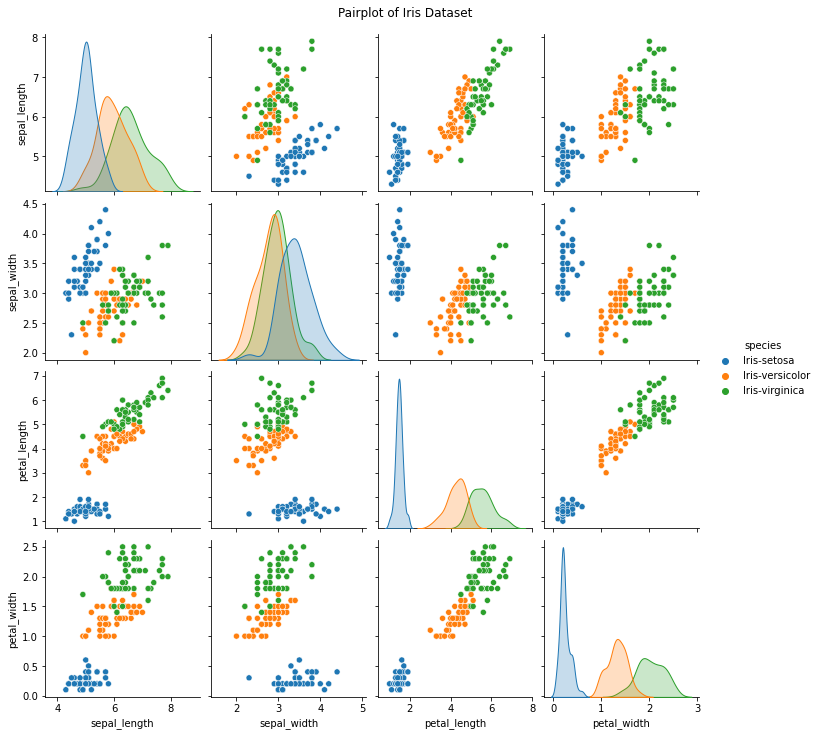

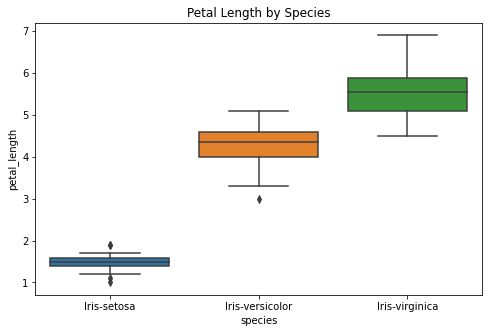

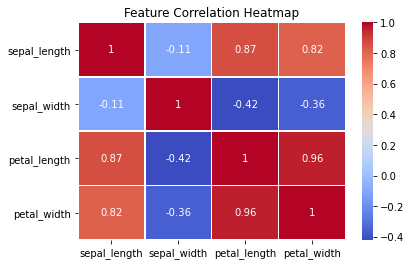

In [4]:
# ========================
# 🔹 Task 3: Data Visualization
# ========================

# 1. Pairplot - relationships between all numeric features, colored by species
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# 2. Boxplot - distribution of petal length by species
plt.figure(figsize=(8,5))
sns.boxplot(x="species", y="petal_length", data=df)
plt.title("Petal Length by Species")
plt.show()

# 3. Heatmap - correlation between numeric features
plt.figure(figsize=(6,4))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


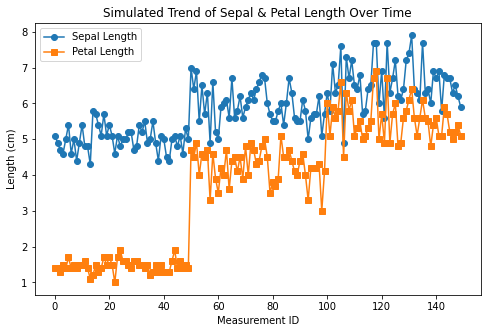

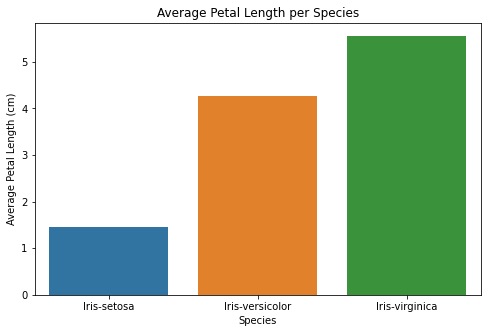

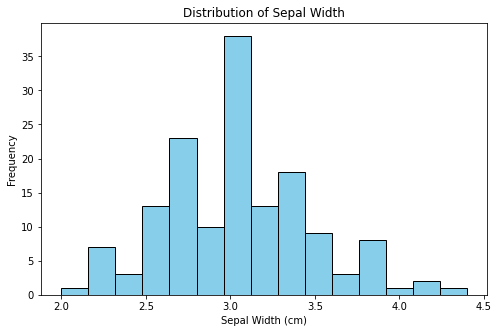

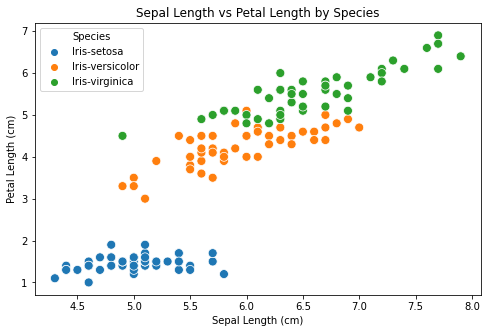

In [5]:
# ========================
# 🔹 More on Data Visualization
# ========================

# 1. Line Chart (simulate trend with row index as timeline)
plt.figure(figsize=(8,5))
plt.plot(df.index, df["sepal_length"], marker="o", label="Sepal Length")
plt.plot(df.index, df["petal_length"], marker="s", label="Petal Length")
plt.title("Simulated Trend of Sepal & Petal Length Over Time")
plt.xlabel("Measurement ID")
plt.ylabel("Length (cm)")
plt.legend()
plt.show()

# 2. Bar Chart (average petal length per species)
plt.figure(figsize=(8,5))
sns.barplot(x="species", y="petal_length", data=df, estimator=np.mean, ci=None)
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()


# 3. Histogram (distribution of sepal width)
plt.figure(figsize=(8,5))
plt.hist(df["sepal_width"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot (sepal length vs. petal length, colored by species)
plt.figure(figsize=(8,5))
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df, s=80)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
